In [48]:
from utils import *
import torch
import torchvision.datasets as datasets
import torchvision.models as models
from torchvision import transforms
import os 

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
#Load data set again
transform = transforms.Compose([transforms.ToTensor(),
                                # expand chennel from 1 to 3 to fit
                                # ResNet pretrained model
                                transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
                                ])
batch_size = 256

data_file_path="../../data"
# download dataset
mnist_train = datasets.MNIST(root=data_file_path, train=True, download=False, transform=transform)
mnist_test = datasets.MNIST(root=data_file_path, train=False, download=False, transform=transform)
print(len(mnist_train), len(mnist_test))

# Load dataset
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,
    shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size,
    shuffle=True, num_workers=0)

60000 10000


In [71]:
## Load pretrained and normal model
seed=5
#Pretrained
encoder_pretrained = ResNetFeatrueExtractor18(pretrained=True)
encoder_pretrained.load_state_dict(torch.load(f'models/encoder_pretrained_model_seed{seed}.pth'))
#From scratch
encoder = ResNetFeatrueExtractor18(pretrained=False)
encoder.load_state_dict(torch.load(f'models/encoder_model_seed{seed}.pth'))

/home/hillary/miniconda3/envs/opti/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/hillary/miniconda3/envs/opti/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/hillary/miniconda3/envs/opti/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


<All keys matched successfully>

In [72]:
max_batches=50
latents,labels=get_latent_vectors(encoder_pretrained,test_loader,max_batches=max_batches)

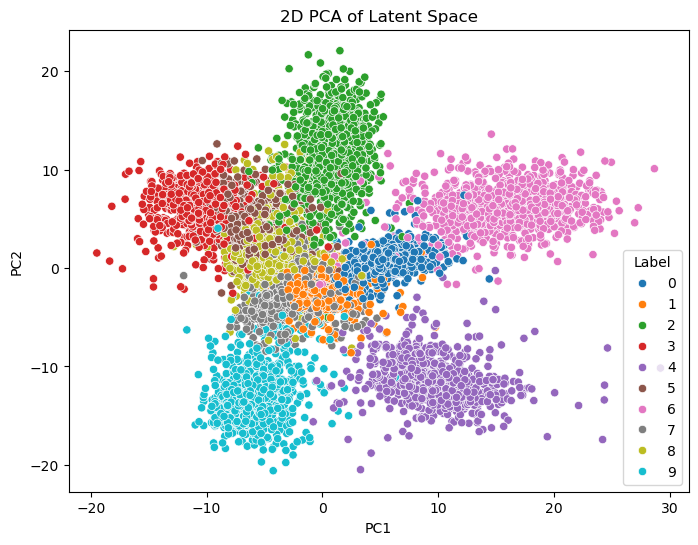

In [73]:
visualize_latent_space_pca(latents,labels,f"figures/latent_space_pca_pretrained_seed{seed}.png")

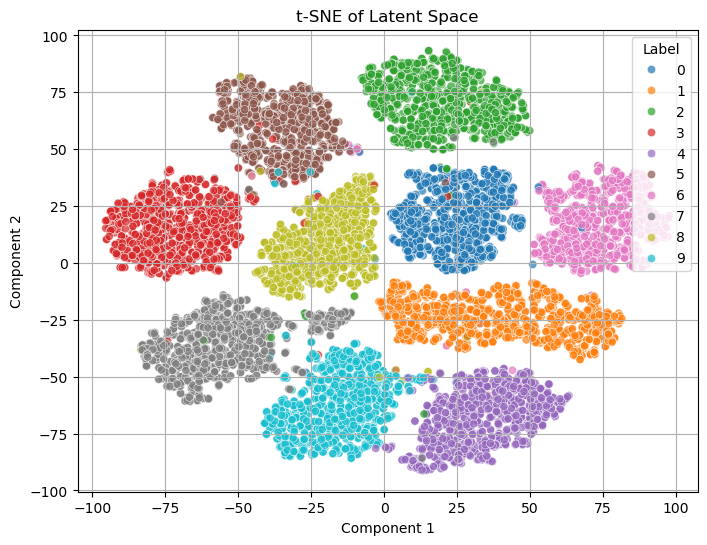

In [74]:
visualize_latent_space_tsne(latents,labels,10,f"figures/latent_space_tsne_pretrained_seed{seed}.png")

In [75]:
latents,labels=get_latent_vectors(encoder,test_loader,max_batches=max_batches)

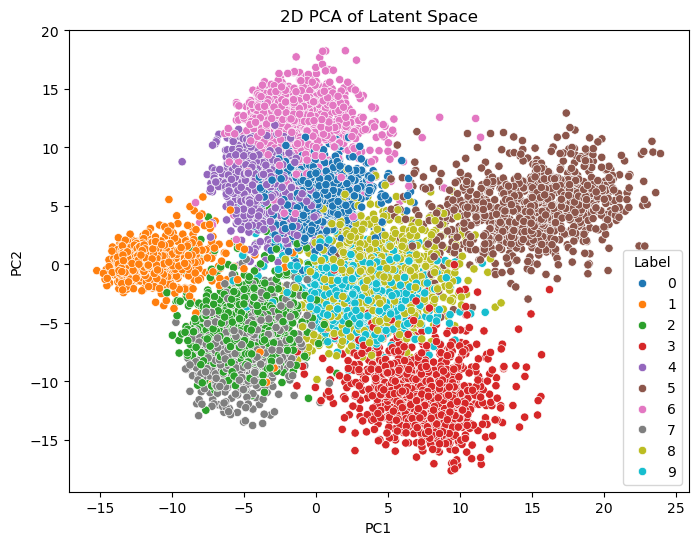

In [76]:
visualize_latent_space_pca(latents,labels,f"figures/latent_space_pca_seed{seed}.png")

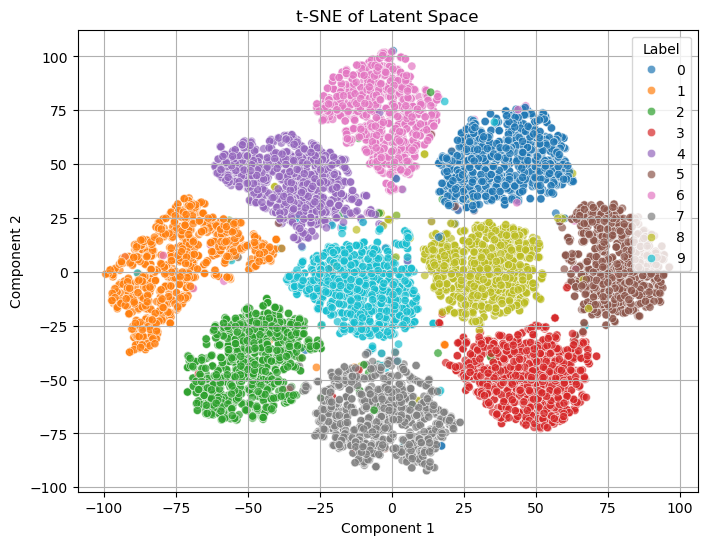

In [77]:
visualize_latent_space_tsne(latents,labels,10,f"figures/latent_space_tsne_seed{seed}.png")